In [1]:
#Loading the data.
import pandas as pd
import numpy as np
data=pd.read_csv("Rainfall.csv")
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [3]:
#Remove the space in cloumns data.
data.columns=data.columns.str.strip()

In [4]:
#data information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
# Checking for missing values.
data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [6]:
#Handling missing values(Using mean).
data.fillna(data['winddirection'].mean(),inplace=True)
data.fillna(data['windspeed'].mean(),inplace=True)

In [7]:
#Once again checking for missing values.
data.isnull().sum().sum()

np.int64(0)

In [8]:
#To see structure of the data.
data.shape

(366, 12)

In [9]:
#Dropping the unwanted columns.
data.drop(['day','mintemp','maxtemp','temparature'], axis=1, inplace=True)
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,19.9,95,81,yes,0.0,40.0,13.7


In [11]:
#Converting categorical column into numerical column.
data['rainfall'] = data['rainfall'].map({'yes': 1, 'no': 0})
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


#Exploratory Data Analysis (EDA)

Histogram

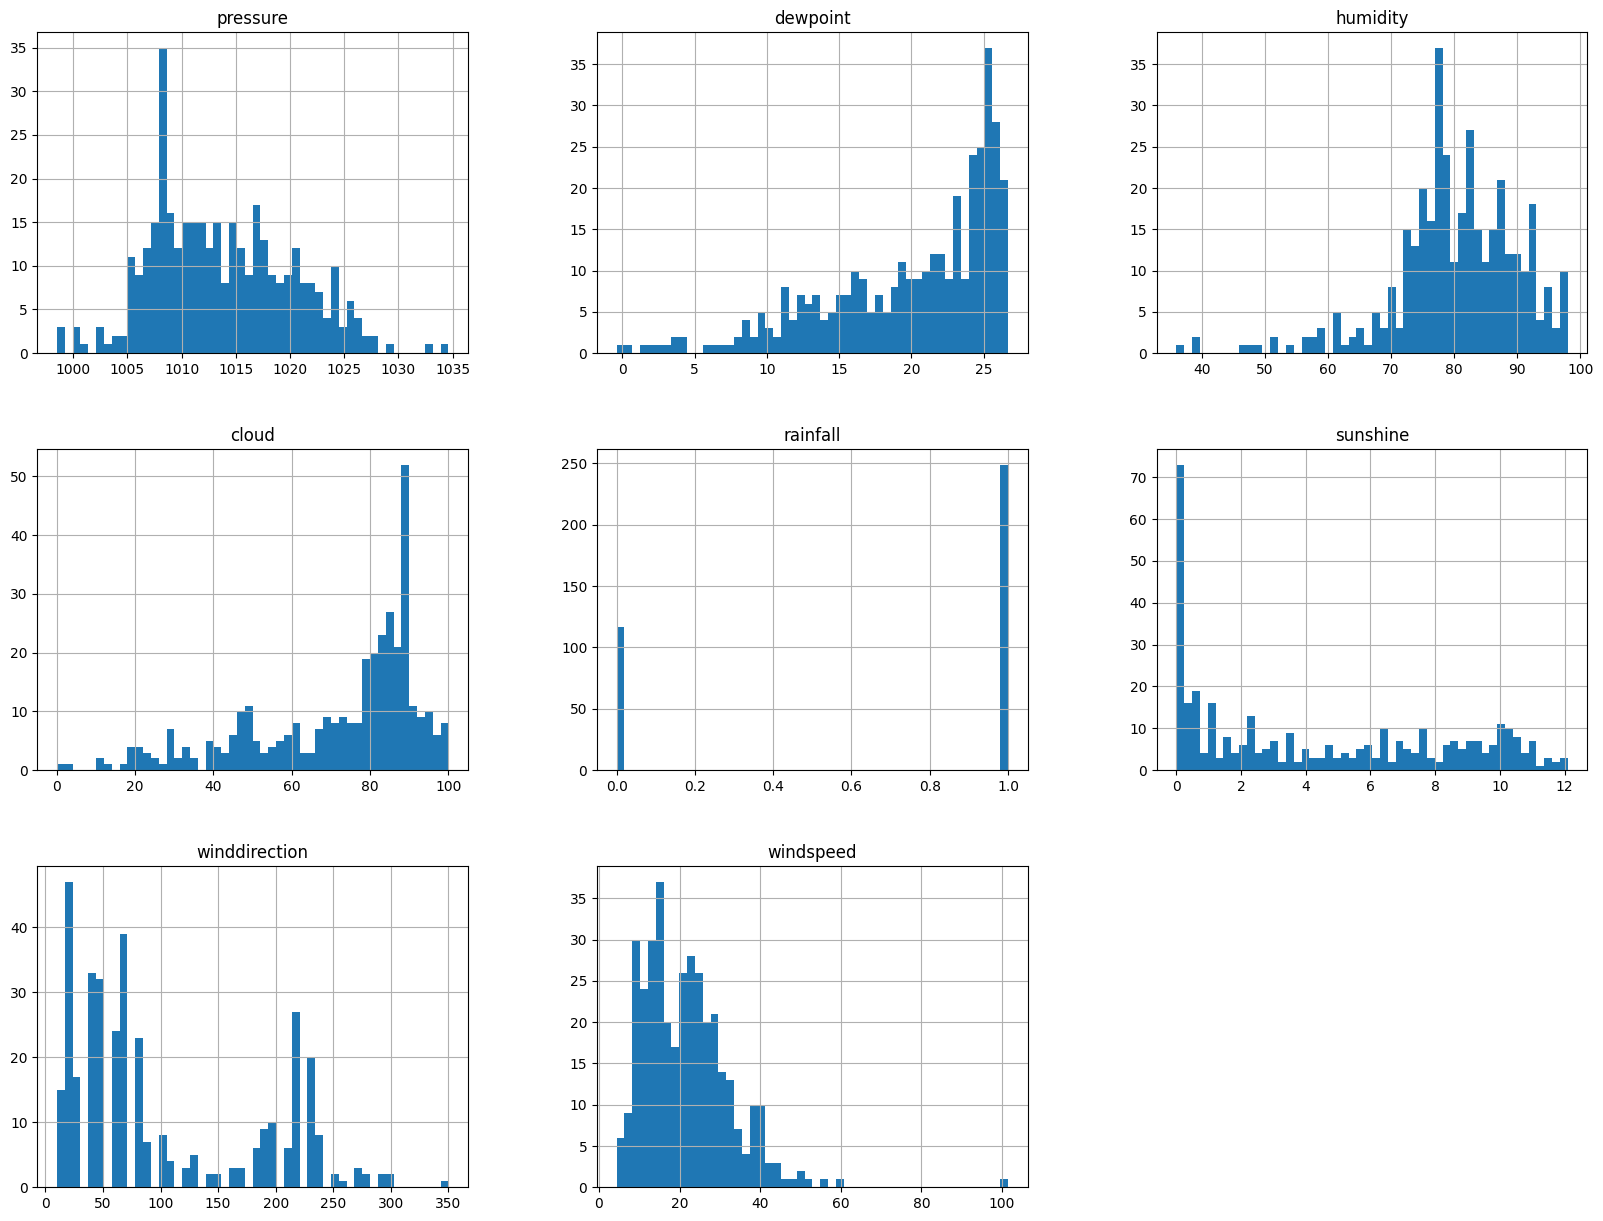

In [12]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

Feature Selection

In [13]:
X = data.drop('rainfall', axis=1)
y = data['rainfall']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Barplot of Target variable

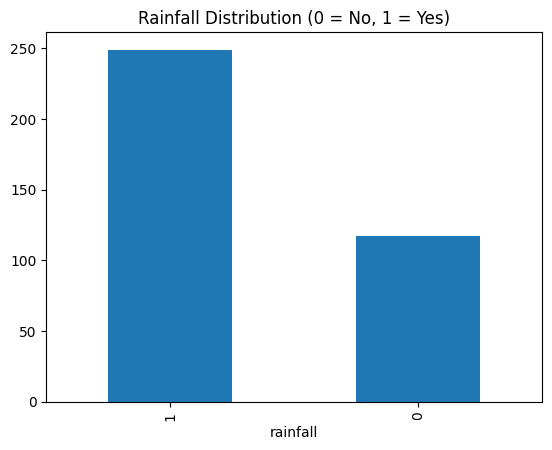

In [14]:
y.value_counts().plot(kind='bar')
plt.title("Rainfall Distribution (0 = No, 1 = Yes)")
plt.show()

In [15]:
data.corr()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
pressure,1.000000,-0.860232,-0.274907,0.005621,-0.089275,-0.198171,-0.661153,0.319423
dewpoint,-0.860232,1.000000,0.425282,0.044635,0.139916,0.185234,0.627407,-0.329852
humidity,-0.274907,0.425282,1.000000,0.655493,0.489623,-0.563579,0.101190,-0.059071
cloud,0.005621,0.044635,0.655493,1.000000,0.625766,-0.848334,-0.076154,0.245829
rainfall,-0.089275,0.139916,0.489623,0.625766,1.000000,-0.552519,-0.013206,0.156334
sunshine,-0.198171,0.185234,-0.563579,-0.848334,-0.552519,1.000000,0.253163,-0.265251
winddirection,-0.661153,0.627407,0.101190,-0.076154,-0.013206,0.253163,1.000000,-0.203113
windspeed,0.319423,-0.329852,-0.059071,0.245829,0.156334,-0.265251,-0.203113,1.000000


 Correlation Heatmap

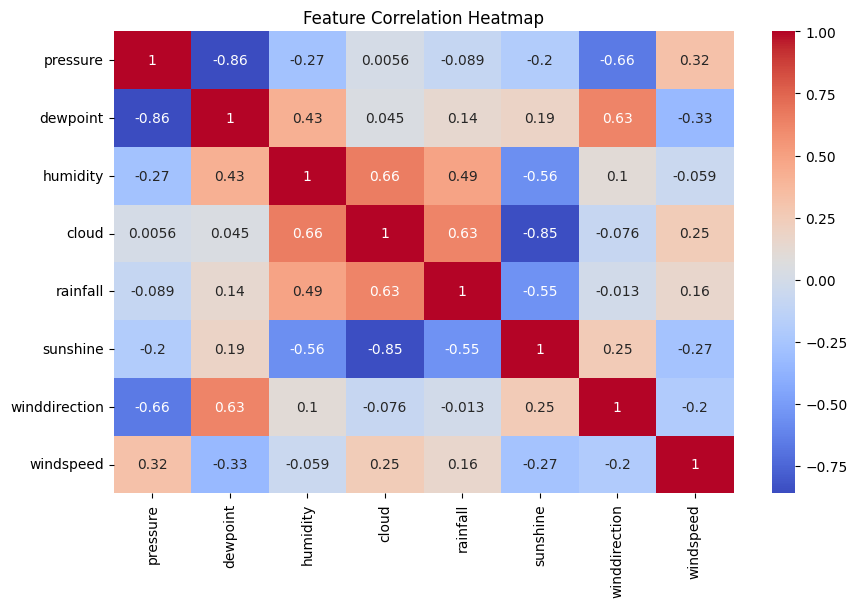

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Boxplot for Outlier Detection

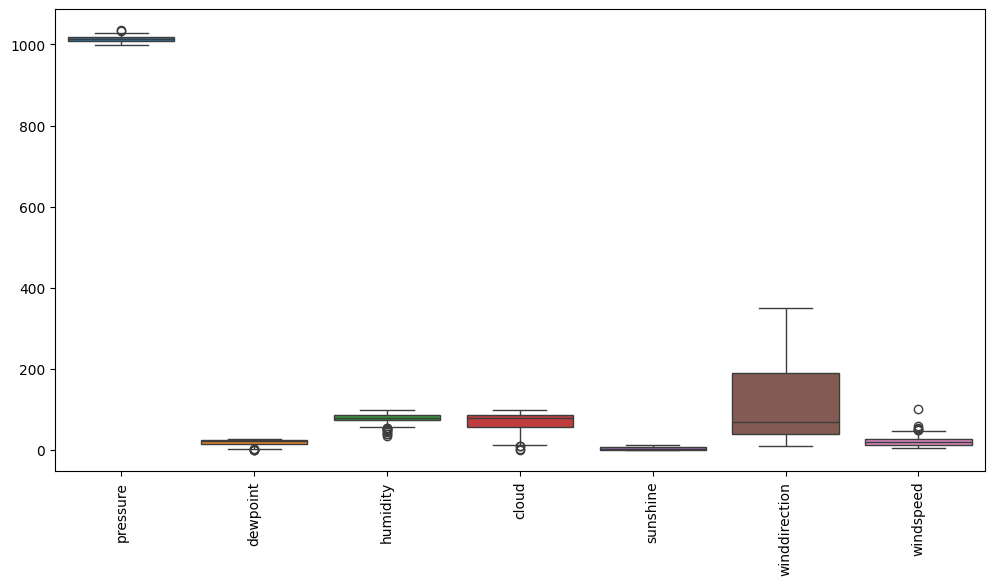

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()


Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7567567567567568

Confusion Matrix:
 [[10 13]
 [ 5 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.43      0.53        23
           1       0.78      0.90      0.84        51

    accuracy                           0.76        74
   macro avg       0.72      0.67      0.68        74
weighted avg       0.74      0.76      0.74        74



In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7702702702702703

Confusion Matrix:
 [[11 12]
 [ 5 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.48      0.56        23
           1       0.79      0.90      0.84        51

    accuracy                           0.77        74
   macro avg       0.74      0.69      0.70        74
weighted avg       0.76      0.77      0.76        74



In [26]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


         Feature  Importance
3          cloud    0.272009
4       sunshine    0.221786
2       humidity    0.136897
6      windspeed    0.116619
1       dewpoint    0.098565
0       pressure    0.093620
5  winddirection    0.060504


In [27]:
log_pred = model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)

In [28]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [29]:
print("Logistic Regression Accuracy:", log_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Logistic Regression Accuracy: 0.7567567567567568
Random Forest Accuracy: 0.7702702702702703


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [31]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [32]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8392168322618353


In [33]:
from sklearn.metrics import accuracy_score, classification_report

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Tuned Random Forest Accuracy: 0.7702702702702703

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.43      0.54        23
           1       0.78      0.92      0.85        51

    accuracy                           0.77        74
   macro avg       0.75      0.68      0.69        74
weighted avg       0.76      0.77      0.75        74



In [36]:
import pickle
model_1= best_rf
with open('rainfall_model.pkl','wb')as file:
    pickle.dump(model_1,file)